# Лекция 9

# План занятия

1. Мониторинг с Prometheus и Grafana

## История и определение

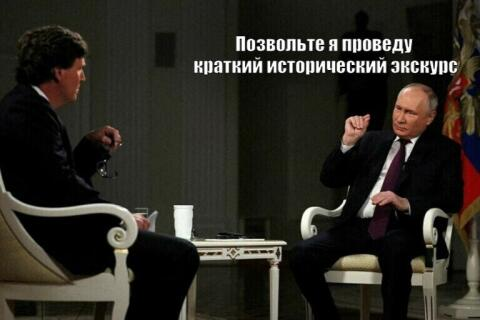

- 1981 году появился протокол `ICMP`, а позднее и `traceroute`
- в 1988 году был создан протокол `SNMP`
- 1980 гг. автино разрабатывается ПО для мониторинга `top`, `vmstat`, `nmon`, `Task Manager`.
- 1999-2002 появились `Cacti`, `Nagios` и `Zabbix`.

Дополнительно можно почитать:

- [A Brief History of Network Monitoring Tools](https://www.liveaction.com/resources/blog-post/a-brief-history-of-network-monitoring-tools/)

## Обзор систем мониторинга

- [PingInfoView](https://www.nirsoft.net/utils/multiple_ping_tool.html), [SolarWinds pingdom](https://www.pingdom.com/)
- [Zabbix](https://www.zabbix.com/)
- [PRTG](https://www.paessler.com/prtg)
- [Nagios Core](https://www.nagios.org/projects/nagios-core/) / [Nagios XI](https://www.nagios.com/products/nagios-xi/)
- [Icinga](https://icinga.com/)
- [Prometheus](https://prometheus.io/)
- [VictoriaMetrics](https://victoriametrics.com/products/open-source/)
- [Grafana](https://grafana.com/grafana/)

Дополнительно можно еще поглядеть иснтрументы тут:
- [Best Enterprise Monitoring Software](https://www.g2.com/categories/enterprise-monitoring)
- [Топ 20 бесплатных систем мониторинга](https://serveradmin.ru/top-20-besplatnyh-sistem-monitoringa/)

## Работа с Prometheus и Grafana

Рассмотрим подробнее схему взаимодействия компонентов системы мониторинга на основе Prometheus. Базовая конфигурация состоит из **трех** компонентов экосистемы:

- [Экспортеры (exporters)](https://prometheus.io/docs/instrumenting/exporters/)

Exporters — это программы, которые собирают метрики на хостах и предоставляют к ним доступ на определенном HTTP-порту. Самым распространенным экспортером является node exporter, он собирает метрики ОС и «железа».

Есть и другие exporters:

a. Blackbox exporter — сбор метрик внешних сервисов через HTTP, HTTPS, DNS, TCP, ICMP. Порт для доступа по умолчанию — 9115;

b. Consule exporter — сбор метрик из Consule, ПО от Hashicorp, которое обеспечивает регистрацию и хранение информации о работающих IT сервисах в сети организации. Порт для доступа по умолчанию — 9107;

c. Graphite exporter — сбор метрик из системы мониторинга Graphite. Порт для доступа по умолчанию — 9108;

d. HAProxy exporter — сбор метрик web-сервера HAProxy. Порт для доступа по умолчанию — 9101;

e. Memcached exporter — сбор метрик Memcached, сервиса кэширования данных в оперативной памяти на основе хеш-таблицы. Порт для доступа по умолчанию — 9150;

f. Node exporter — сбор системных метрик (процессор, память, и т.д.). Порт для доступа по умолчанию — 9100;

g. Mysql exporter — сбор метрик работы сервера MySQL. Порт для доступа по умолчанию — 9104;

h. Postgres exporter — сбор метрик работы сервера PostgreSQL. Порт для доступа по умолчанию — 9187;

i. Pushgateway — сбор метрик сервиса Pushgateway, куда попадают метрики, когда стандартная pull-модель prometheus не применима. Порт для доступа по умолчанию — 9091;

g. Statsd exporter — сбор метрик Statsd-демона, написанного на Node.js, который агрегирует и суммирует метрики, полученные из разных приложений. Порт для доступа по умолчанию — 9102.

- [Prometheus](https://prometheus.io/docs/concepts/data_model/)

- [Alertmanager](https://prometheus.io/docs/alerting/latest/alertmanager/)

Однако по-настоящему потенциал Prometheus раскрывается при добавлении двух дополнительных компонентов (или как минимум одного – `Grafana`):

- [VictoriaMetrics](https://victoriametrics.com/products/open-source/)
- [Grafana](https://grafana.com/docs/grafana/latest/visualizations/panels-visualizations/visualizations/)

Использование Grafana вместе с Prometheus уже стало стандартом, в то время как добавление в конфигурацию VictoriaMetrics безусловно опционально и необходимо скорее для высоконагруженных систем.

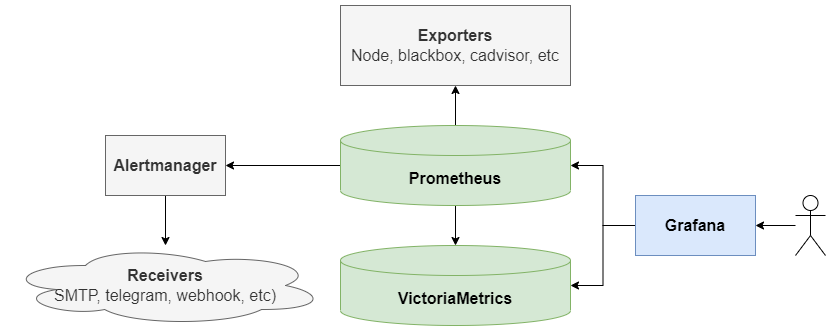

## Что такое Grafana и как она работает?

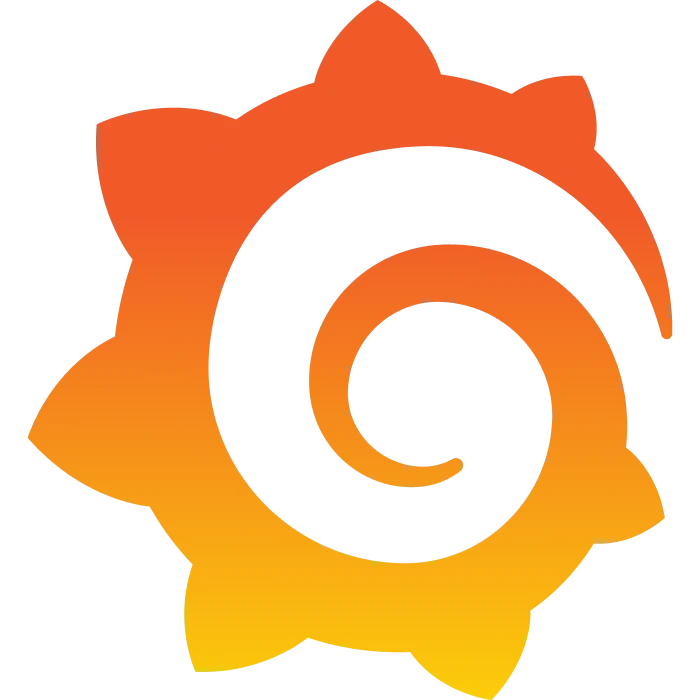

**Grafana** — это open source система визуализации данных. Grafana поддерживает множество типов баз данных:

1. Graphite и Prometheus — легкая система сбора, хранения и визуализации данных;
2. CloudWatch — это сервис мониторинга облачных ресурсов AWS и приложений, работающих на AWS;
3. Elasticsearch — поисковый движок с json rest api, использующий Lucene (свободная библиотека для высокопроизводительного полнотекстового поиска) и написанный на Java;
4. InfluxDB и OpenTSDB— open source система управления базами данных для хранения временных рядов;
5. Kairos DB — open source распределенная масштабируемая база данных временных рядов.

Устанавливается Grafana немного непривычным способом. Она не входит в состав стандартных Linux репозиториев apt или apt-get. Мы не будем заострять внимание на установке Grafana в этой статье, оставим ссылку на мануал.

Grafana работает так: вы подключаете её по API к любой из поддерживаемых БД или сразу к нескольким БД, она забирает оттуда данные и проецирует их на шаблоны графиков и дашборды, которые вы выбрали. Сама по себе Grafana лишь инструмент для визуализации данных, всю работу по выгрузке, хранению и предоставлению доступа к данным делают экспортеры и СУБД.

## Prometheus

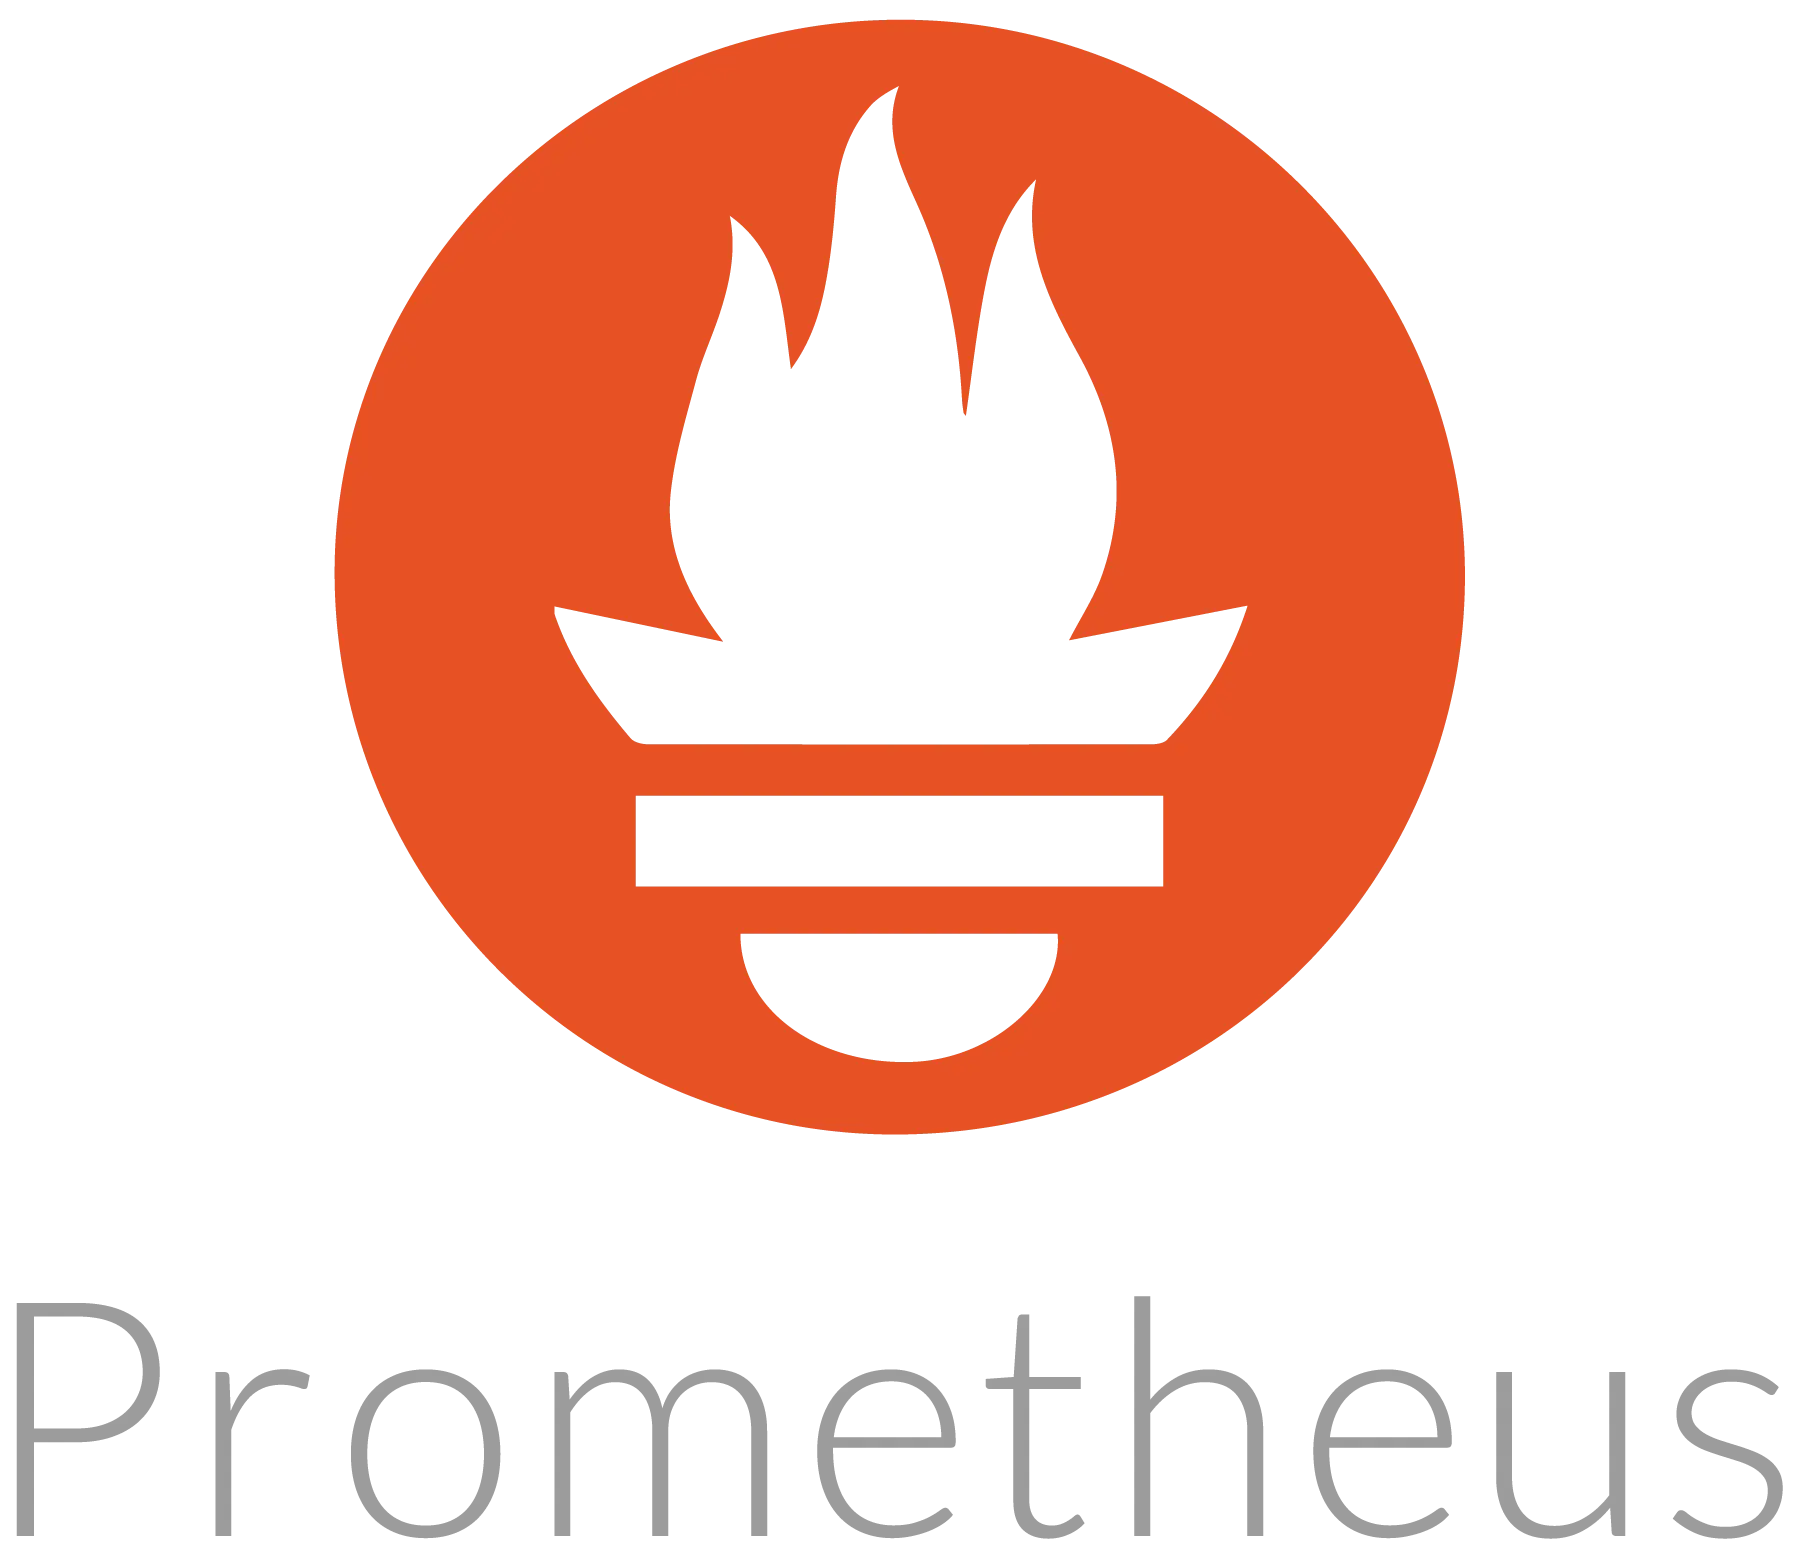

Prometheus — это система мониторинга и оповещений, хранящая и обрабатывающая метрики, собираемые из экспортеров в Time Series Database (TSDB). В отличие от SQl-like СУБД, Prometheus сам собирает метрики по указанным хостам.

Для работы с метриками в Prometheus используется язык запрос PromQL. Он позволяет составлять сложные запросы и использовать математические операторы. Результат запроса может быть выведен в табличной или графической форме.

Сами данные хранятся в виде набора файлов на жестком диске сервера, где установлен Prometheus. Через конфигурационный файл Prometheus можно настроить длительность хранения данных и задать объём дискового пространства для хранения данных.

Также Prometheus может оповещать, о различных событиях, которые настраиваются администратором Prometheus в специальном конфигурационном файле alerts. Для удобной и корректной работы системы оповещения применяется специальное расширение — AlertManager. О нём и поговорим далее.

## О системе мониторинга, построенной на Grafana и Prometheus

1. Основной компонент — Prometheus. Prometheus получает метрики из разных сервисов и собирает их в одном месте.

2. Node exporter — небольшое приложение, собирающее метрики операционной системы и предоставляющее к ним доступ по HTTP. Prometheus собирает данные с одного или нескольких экземпляров Node Exporter.

3. Grafana — это вишенка на торте. Grafana отображает данные из Prometheus в виде графиков и диаграмм, организованных в дашборды.

## Node Exporter

Первый шаг — установка [Node Exporter](https://github.com/prometheus/node_exporter)

Node Exporter распространяется в виде одного бинарного файла, который можно запустить из любого места в системе. Так что установка довольно проста. После запуска переходим в браузере по адресу `<server_address>:9100/metrics` и смотрим собираемые метрики.



## Prometheus

Второй шаг — установка [Prometheus](https://github.com/prometheus/prometheus) и его настройка на сбор данных с установленного ранее Node Exporter.

Установка Prometheus немного сложнее, но все же достаточно проста. Как и Node Exporter, это один бинарный файл, но дополнительно требуется файл конфигурации и папка для хранения данных.
Для настройки Prometheus на сбор метрик из ранее установленного экземпляра Node Exporter необходимо изменить файл конфигурации. Добавим в раздел static_configs еще один URL:

In [ ]:
static_configs:
    - targets: [‘localhost:9090’, ‘localhost:9100’]

Здесь мы настроили Prometheus на сбор метрик из двух сервисов: самого себя `localhost:9090` и локального экземпляра Node Exporter (localhost:9100).

После запуска Prometheus можно открыть его пользовательский интерфейс в браузере `<server_address>:9090`. На странице `/targets` отображается статус систем, с которых вы получаете метрики. Если все хорошо, то в колонке статуса (State) будет `UP`.

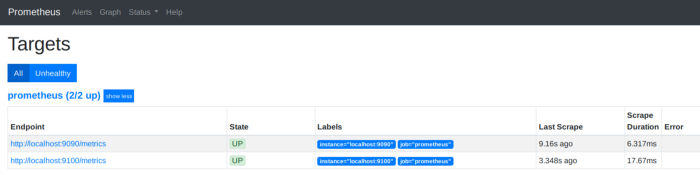

Уже используя только Prometheus, можно делать запросы к собранным данным, и строить графики с помощью инструментов на странице `/graph`. Это хороший инструмент для изучения собираемых метрик и написания сложных запросов к данным. Но мы возложим эту работу на Grafana.

## Grafana

[Grafana](https://github.com/grafana/grafana) — последний компонент нашего решения. Ее задача — подключиться к Prometheus и отобразить собранные метрики на графиках и дашбордах. Grafana взаимодействует только с Prometheus, так как все собираемые метрики хранятся там.


Однако, установка Grafana еще несколько сложнее, чем Prometheus и Node Exporter, но, к счастью, на сайте Grafana есть отличная [документация](https://grafana.com/docs/). Для Ubuntu все просто: скачайте deb-пакет и установите его:

In [ ]:
wget https://dl.grafana.com/oss/release/grafana_6.4.3_amd64.deb
dpkg -i grafana_6.4.3_amd64.deb

После завершения установки перейдите в браузере по адресу `<server_address>:3000`. Пользователь и пароль по умолчанию `admin`/`admin`. При первом входе пароль необходимо будет изменить.

## Настройка Grafana
После установки всех компонент можно приступить к настройке Grafana.

## Источник данных (datasource)
Первый шаг — настройка источника данных (datasource). По сути, это источник метрик для Grafana. Мы будем получать метрики с нашего сервера Prometheus, поэтому в качестве источника данных выбираем Prometheus и указываем URL http://localhost:9090. Остальные параметры оставляем по умолчанию.

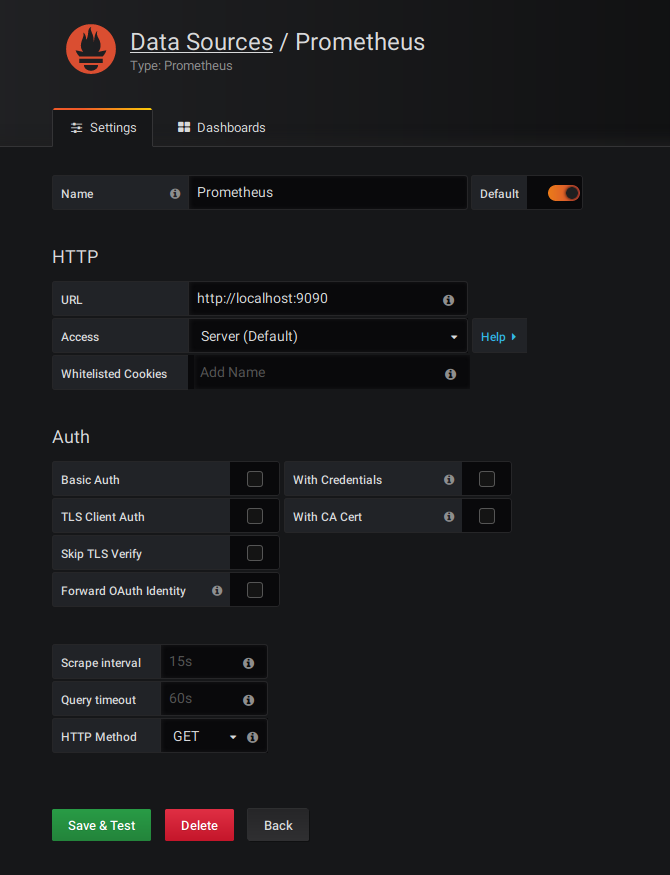

## Дашборд (dashboard)
После настройки Datasource, мы можем создать дашборд. Дашборд — это просто набор панелей, расположенных на одной странице. Панели бывают разные: от простого текста до круговых диаграмм. Каждую панель можно настроить для отображения различных метрик.

Создание своего дашборда с нуля может быть нелегкой задачей. К счастью, Grafana предоставляет простой способ импорта дашбордов, созданных другими пользователями.



Для примера возьмем дашборд из открытого [источника](https://grafana.com/grafana/dashboards/10795-1-node-exporter-0-16-for-prometheus-monitoring-display-board/)

Чтобы установить дашборд, нужно указать его ID на странице Import.

После импорта откройте установленный дашборд с помощью выпадающего списка в левом верхнем углу. При первом открытии он выглядит следующим образом.




## Плагины
Хотя плагины не являются обязательными, но наш дашборд содержит панель, которая использует сторонний плагин, отсутствующий по умолчанию. Эту панель можно удалить (возможно, заменив ее чем-то другим), либо установить недостающий плагин.

Необходимый нам плагин предназначен для отображения круговых диаграмм. Его можно найти по [ссылке](https://grafana.com/grafana/plugins/grafana-piechart-panel).

Установка плагина описана на его странице. Откройте командную строку и выполните следующую команду:

```bash
grafana-cli plugins install grafana-piechart-panel
```

Для завершения установки плагина перезапустите Grafana:

```bash
service grafana-server restart
```

Далее можно обновить страницу — панель с круговой диаграммой должна отображаться правильно.

# Лекция 10

Итак, система мониторинга на основе Prometheus – PAVG (Prometheus, Alertmanager, VictoriaMetrics, Grafana) – предоставляет широкий спектр возможностей. Рассмотрим ее практическое применение. Для упрощения предположим, что основные компоненты будут развернуты на одном сервере мониторинга с применением docker и systemd

## Развертывание экспортеров
Экспортеры могут быть развернуты на сервере мониторинга (например blackbox), на целевых серверах (kafka, mongodb, jmx и др.) или на всех серверах (node, cadvisor и др.). Как правило не требовательны к аппаратным ресурсам. В качестве примера возьмем три экспортера – node (сбор данных по ЦПУ, ОЗУ, дисковой подсистеме и сети), cadvisor (сбор информации о контейнерах) и blackbox (проверка точек входа TCP, HTTP/HTTPS и др.). Для развертывания необходимо:
- Создать `/etc/systemd/system/node-exporter.service`
- Создать `/etc/systemd/system/cadvisor.service`
- Создать `/etc/systemd/system/blackbox-exporter.service`

Затем нам нужно запустить сервисы.

Если мы работаем на Linux, то можем использовать следующие команды:

```bash
sudo systemctl daemon-reload                                   # Перезагружает конфигурации systemd
sudo systemctl start node-exporter cadvisor blackbox-exporter  # Запускает сервисы
sudo systemctl status node-exporter cadvisor blackbox-exporter # Показывает статус сервисов
sudo systemctl enable node-exporter cadvisor blackbox-exporter # Включает автозапуск сервисов при загрузке
```

а если на windows, то мы можем написать например PowerShell-скрипт, чтобы постоянно руками не вводить каждую команду, см: `start_exporters.ps1`. Для запуска скрипта нужно открыть PowerShell, перейти в дирректорию проекта, где находится сам скрипт и прописать команду

```bash
.\start_exporters.ps1
```
P.S. Этот скрипт не будет автоматически перезапускать контейнеры при падении или при загрузке системы.

На последней итерации нам нужно проверить работу (здесь `<hostname>` – DNS запись или IP адрес вашего сервера)
- http://`<hostname>`:9100/metrics (node)
- http://`<hostname>`:8080/metrics (cadvisor)
- http://`<hostname>`:9115/metrics (blackbox)
- http://`<hostname>`:9115/probe?target=github.com&module=http_2xx
- http://`<hostname>`:9115/probe?target=github.com:443&module=tcp_connect

## Развертывание Alertmanager
Как правило не требователен к аппаратным ресурсам. Для развертывания необходимо:

- Создать `/etc/alertmanager/alertmanager.yml`

В рассматриваемом примере уведомления рассылаются на почту и две дополнительные точки входа API – для срочных уведомлений (warning|error|critical) и отчетов (info). Подробнее о подготовке конфигурации можно почитать в статье [Alerting Configuration](https://prometheus.io/docs/alerting/latest/configuration/)

- Создать `/etc/systemd/system/alertmanager.service`

Затем нужно запустить сервисы:

```bash
sudo systemctl daemon-reload        # Перезагружает конфигурации systemd, чтобы он узнал о новых или изменённых .service файлах
sudo systemctl start alertmanager   # Запускает сервис alertmanager
sudo systemctl status alertmanager  # Показывает текущий статус сервиса alertmanager (работает/не работает, логи и т.д.)
sudo systemctl enable alertmanager  # Включает автозапуск сервиса alertmanager при загрузке системы
```
На последней итерации нам нужно проверить работу (здесь `<hostname>` – DNS запись или IP адрес вашего сервера)
- http://`<hostname>`:9093
- http://`<hostname>`:9093/#/alerts
- http://`<hostname>`:9093/#/status

Для обеспечения высокой доступности Alertmanager поддерживает развертывание в кластерной конфигурации. Подробнее о создании кластера можно почитать в статье [Alerting High Availability](https://prometheus.io/docs/alerting/latest/alertmanager/#high-availability).

## Развертывание VictoriaMetrics

Потребление ресурсов VictoriaMetrics зависит от количества опрашиваемых экспортеров и собираемых метрик, нагрузки запросами на чтение, глубины хранения данных и др. факторов. Вывести средние значения для старта достаточно сложно, однако для небольшой инсталляции достаточно 1 ядра ЦПУ, 2 ГБ ОЗУ и 20 ГБ дискового пространства. Для развертывания необходимо:

- Подготовить каталог для хранения данных

```bash
sudo mkdir -p /data/victoriametrics
```
- Создать `/etc/systemd/system/victoriametrics.service` здесь указано хранение метрик в течение 2 месяцев

Затем нужно запустить сервис

```bash
sudo systemctl daemon-reload          # Перезагружает конфигурации systemd, чтобы он узнал о новых или изменённых .service файлах
sudo systemctl start victoriametrics  # Запускает сервис victoriametrics
sudo systemctl status victoriametrics # Показывает текущий статус сервиса victoriametrics (работает/не работает, логи и т.д.)
sudo systemctl enable victoriametrics # Включает автозапуск сервиса victoriametrics при загрузке системы
```
На последней итерации нужно проверить работу Проверить работу (здесь `<hostname>` – DNS запись или IP адрес вашего сервера):
- http://`<hostname>`:8428

## Развертывание Prometheus

Потребление ресурсов Prometheus зависит от количества опрашиваемых экспортеров и собираемых метрик, нагрузки запросами на чтение, глубины хранения данных и др. факторов. Вывести средние значения для старта достаточно сложно, однако для небольшой инсталляции достаточно 1 ядра ЦПУ, 2 ГБ ОЗУ и 20 ГБ дискового пространства. Для развертывания необходимо:

- Создать пользователя и подготовить каталоги для конфигурационных файлов и хранения данных
```bash
sudo useradd -M -u 1101 -s /bin/false prometheus         # Создаёт системного пользователя prometheus с UID 1101, без домашней директории и без возможности входа в систему
sudo mkdir -p /etc/prometheus/rule_files                  # Создаёт каталог для файлов с правилами Prometheus (если не существует)
sudo mkdir -p /data/prometheus                            # Создаёт каталог для хранения данных Prometheus (если не существует)
sudo chown -R prometheus /etc/prometheus /data/prometheus # Назначает владельца prometheus на каталоги конфигурации и данных (рекурсивно)
```
Обязательно убедиться, что на раздел с каталогом для хранения данных выделено достаточно дискового пространства

- Создать конфигурационный файл `/etc/prometheus/prometheus.yml` (здесь `<hostname>` – DNS запись или IP адрес вашего сервера)
- Создать правила уведомлений `/etc/prometheus/rule_files/main.yml`

В данном случае для примера мы добавили только один файл c несколькими группами правил, однако в больших инсталляциях для удобства группы распределены по различным файлам – `application`, `container`, `hardware`, `kubernetes`, `mongodb`, `elasticsearch` и т.д.

- Создать `/etc/systemd/system/prometheus.service`

Указано хранение метрик в течение 14 суток

Затем нужно запустить сервис
```bash
sudo systemctl daemon-reload     # Перезагружает конфигурации systemd, чтобы он узнал о новых или изменённых .service файлах
sudo systemctl start prometheus  # Запускает сервис prometheus
sudo systemctl status prometheus # Показывает текущий статус сервиса prometheus (работает/не работает, логи и т.д.)
sudo systemctl enable prometheus # Включает автозапуск сервиса prometheus при загрузке системы
```

На последней итерации нужно проверить работу (здесь `<hostname>` – DNS запись или IP адрес вашего сервера):
- http://<hostname>:9090
Status → Configuration, Status → Rules, Status → Targets 

Для обеспечения высокой доступности Prometheus может быть развернут в нескольких экземплярах, каждый из которых будет опрашивать экспортеры и сохранять данные в локальную БД.

## Развертывание Grafana

Grafana не слишком требовательна к потреблению ресурсов – для небольшой инсталляции достаточно 1 ядра ЦПУ и 1 ГБ ОЗУ (хотя, конечно, есть нюанс...). Для развертывания необходимо:

- Создать пользователя и подготовить каталоги для конфигурационных файлов и хранения данных

```bash
sudo useradd -M -u 1102 -s /bin/false grafana       # Создаёт системного пользователя grafana с UID 1102, без домашней директории и без возможности входа в систему
sudo mkdir -p /etc/grafana/provisioning/datasources # Создаёт каталог для файлов декларативного описания источников данных (если не существует)
sudo mkdir /etc/grafana/provisioning/dashboards     # Создаёт каталог для файлов декларативного описания дашбордов (если не существует)
sudo mkdir -p /data/grafana/dashboards              # Создаёт каталог для хранения данных Grafana (если не существует)
sudo chown -R grafana /etc/grafana/ /data/grafana   # Назначает владельца grafana на каталоги конфигурации и данных (рекурсивно)
```
- Создать файл декларативного описания источников данных `/etc/grafana/provisioning/datasources/main.yml` (здесь `<hostname>` – DNS запись или IP адрес вашего сервера)
- Создать файл декларативного описания дашбордов `/etc/grafana/provisioning/dashboards/main.yml`
- Добавить дашборд Node Exporter Full в каталог `/data/grafana/dashboards`
```bash
cd ~/ && git clone https://github.com/rfmoz/grafana-dashboards                           # Переходит в домашнюю директорию и клонирует репозиторий с дашбордами для Grafana
sudo cp grafana-dashboards/prometheus/node-exporter-full.json /data/grafana/dashboards/  # Копирует файл дашборда node-exporter в каталог, откуда Grafana будет его читать (с правами администратора)
```
- Создать `/etc/systemd/system/grafana.service`

Затем нужно запустить сервис
```bash
sudo systemctl daemon-reload    # Перезагружает конфигурации systemd, чтобы он узнал о новых или изменённых .service файлах
sudo systemctl start grafana    # Запускает сервис grafana
sudo systemctl status grafana   # Показывает текущий статус сервиса grafana (работает/не работает, логи и т.д.)
sudo systemctl enable grafana   # Включает автозапуск сервиса grafana при загрузке системы
```

На последней итерации нужно проверить работу (здесь `<hostname>` – DNS запись или IP адрес вашего сервера):
- http://`<hostname>`:3000 (учетные данные по умолчанию – admin/admin, желательно сразу изменить пароль)
Configuration → Data sources
Explore → Metric → up → Run query
Dashboards → Browse → General → Node Exporter Full